#効果測定（回帰）
##柏校　古田　精一

#0.環境の準備
まずは環境の準備をします。<br />
図表を描画する際に日本語フォントを使用できるよう、追加のパッケージをインストールします。<br />
また、定番で使用する各種のモジュールも、最初に宣言しておきます。

In [1]:
!pip install japanize-matplotlib

     |████████████████████████████████| 4.1 MB 5.0 MB/s 
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120275 sha256=dcd4b579469bba2a8ca4de8852994da9b9e8dc0718f1c410c894241d58a143db
  Stored in directory: /root/.cache/pip/wheels/83/97/6b/e9e0cde099cc40f972b8dd23367308f7705ae06cd6d4714658
Successfully built japanize-matplotlib


In [2]:
import numpy as np #データ加工用に追加
import pandas as pd
from sklearn.model_selection import train_test_split
import japanize_matplotlib #日本語フォント表示用
%matplotlib inline

#1.データの準備
##1-1.データの読み込み
まずは使用するデータを読み込みます。<br />

In [3]:
df = pd.read_csv('auto_mgp.csv')

df.head()

,Unnamed: 0,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,0,18.0,8,307.0,130.0,3504,12.0,70,1
1,1,15.0,8,350.0,165.0,3693,11.5,70,1
2,2,18.0,8,318.0,150.0,3436,11.0,70,1
3,3,16.0,8,304.0,150.0,3433,12.0,70,1
4,4,17.0,8,302.0,140.0,3449,10.5,70,1


分析に使用する項目だけ抜き出します<br/>
また、項目が英語表記なので、わかりやすく日本語に変更します。<br />

In [4]:
columns = ['MPG','Cylinders','Displacement','Horsepower','Weight','Acceleration','Model Year','Origin']
df = df[columns]
columns = ['燃費','シリンダ数','排気量','馬力','車重','加速','発表年','Origin']
df.columns = columns
df.head()

,燃費,シリンダ数,排気量,馬力,車重,加速,発表年,Origin
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1


一度、データの形を確認してみます。<br />
「シリンダ数」と「Origin」は離散データのようです。ダミー化しましょう。<br />

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f63107d0290>,
      dtype=object)

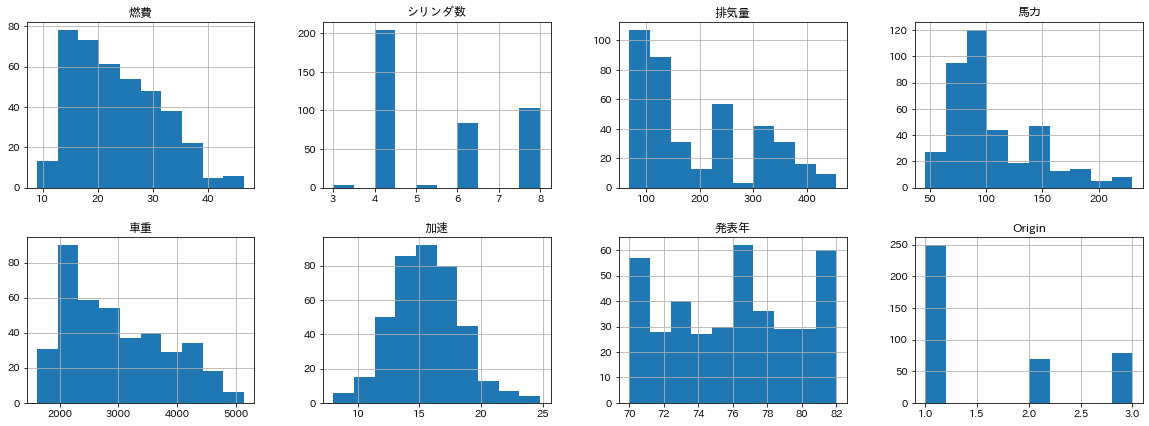

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
df.hist(figsize=(20,7), layout=(2,4))

##1-2.データの整形（ダミー変数の追加）
分析に入る前に、データの整形を行います。<br />
まずは「Origin」より、ダミー変数として「欧州車」「日本車」を作成します。<br />

In [6]:
df_origin = pd.get_dummies(df['Origin'], drop_first = True)
columns = ['欧州車', '日本車']
df_origin.columns = columns
df2 = df.drop(columns='Origin')
df2 = pd.concat([df2,df_origin], axis = 1)
df2.head()

,燃費,シリンダ数,排気量,馬力,車重,加速,発表年,欧州車,日本車
0,18.0,8,307.0,130.0,3504,12.0,70,0,0
1,15.0,8,350.0,165.0,3693,11.5,70,0,0
2,18.0,8,318.0,150.0,3436,11.0,70,0,0
3,16.0,8,304.0,150.0,3433,12.0,70,0,0
4,17.0,8,302.0,140.0,3449,10.5,70,0,0


次に、「シリンダ数」から、ダミー変数として「6気筒」と「8気筒」を抽出します。<br />

In [7]:
df_cylinders = pd.get_dummies(df['シリンダ数'], drop_first=True)
df_cylinders = df_cylinders.drop(columns=[4,5])
columns = ['6気筒','8気筒']
df_cylinders.columns = columns
df2 = df2.drop(columns=['シリンダ数', '発表年'])
df2 = pd.concat([df2, df_cylinders], axis=1)
df2.head()

,燃費,排気量,馬力,車重,加速,欧州車,日本車,6気筒,8気筒
0,18.0,307.0,130.0,3504,12.0,0,0,0,1
1,15.0,350.0,165.0,3693,11.5,0,0,0,1
2,18.0,318.0,150.0,3436,11.0,0,0,0,1
3,16.0,304.0,150.0,3433,12.0,0,0,0,1
4,17.0,302.0,140.0,3449,10.5,0,0,0,1


今度は各データの特徴を確認します。<br />

In [8]:
df2.describe()

,燃費,排気量,馬力,車重,加速,欧州車,日本車,6気筒,8気筒
count,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,193.425879,104.469388,2970.424623,15.568090,0.175879,0.198492,0.211055,0.258794
std,7.815984,104.269838,38.491160,846.841774,2.757689,0.381197,0.399367,0.408571,0.438523
min,9.000000,68.000000,46.000000,1613.000000,8.000000,0.000000,0.000000,0.000000,0.000000
25%,17.500000,104.250000,75.000000,2223.750000,13.825000,0.000000,0.000000,0.000000,0.000000
50%,23.000000,148.500000,93.500000,2803.500000,15.500000,0.000000,0.000000,0.000000,0.000000
75%,29.000000,262.000000,126.000000,3608.000000,17.175000,0.000000,0.000000,0.000000,1.000000
max,46.600000,455.000000,230.000000,5140.000000,24.800000,1.000000,1.000000,1.000000,1.000000


「馬力」に欠損値がありますので、平均値で補完します。<br />

In [9]:
df.isnull().sum()

燃費        0
シリンダ数     0
排気量       0
馬力        6
車重        0
加速        0
発表年       0
Origin    0
dtype: int64

In [10]:
df['馬力']=df['馬力'].fillna(df['馬力'].mean())

##1-3.データ間の依存関係の確認
次に、データ間の依存関係の確認と、データの分布を確認します。<br />
「排気量」「馬力」「車重」については「燃費」に対して反比例の関係がありそうです。<br />
逆数のデータを準備します。<br />

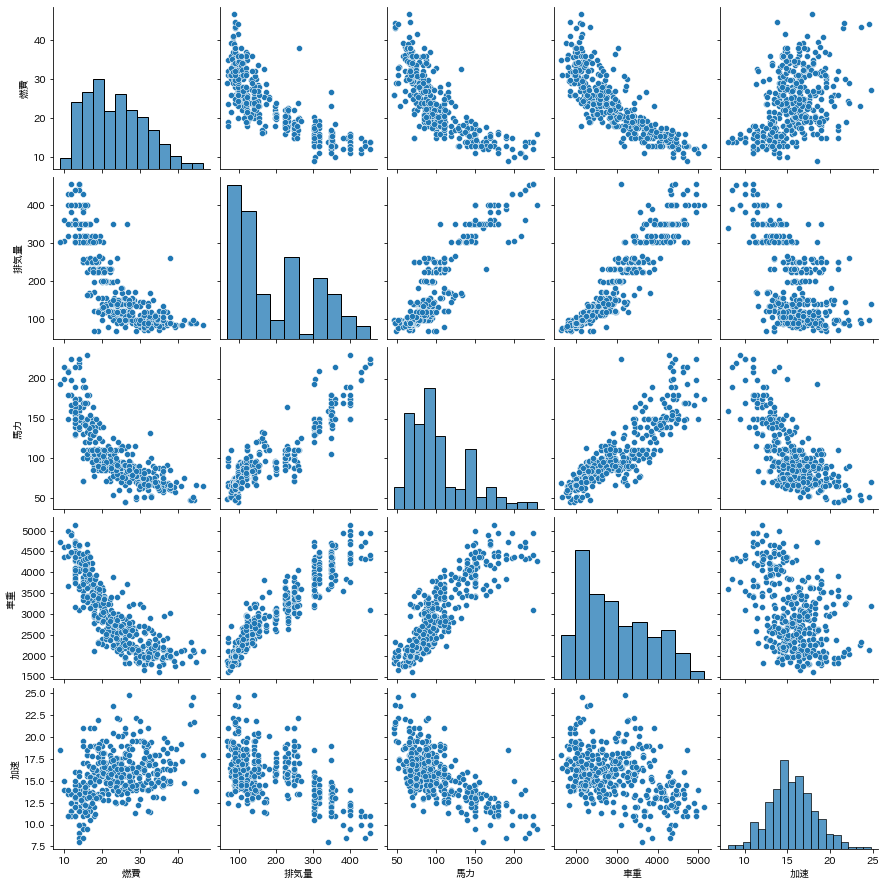

In [11]:
import seaborn as sns
columns = ['燃費','排気量','馬力','車重','加速']
df_nondummies = df2[columns]
sns.pairplot(df_nondummies)

In [12]:
#データが有効数字ギリギリなので、桁上げしておきます
df2['排気量inv'] = 1 / df['排気量'] *1000
df2['馬力inv'] = 1 / df['馬力'] * 1000
df2['車重inv'] = 1 / df['車重'] * 10000

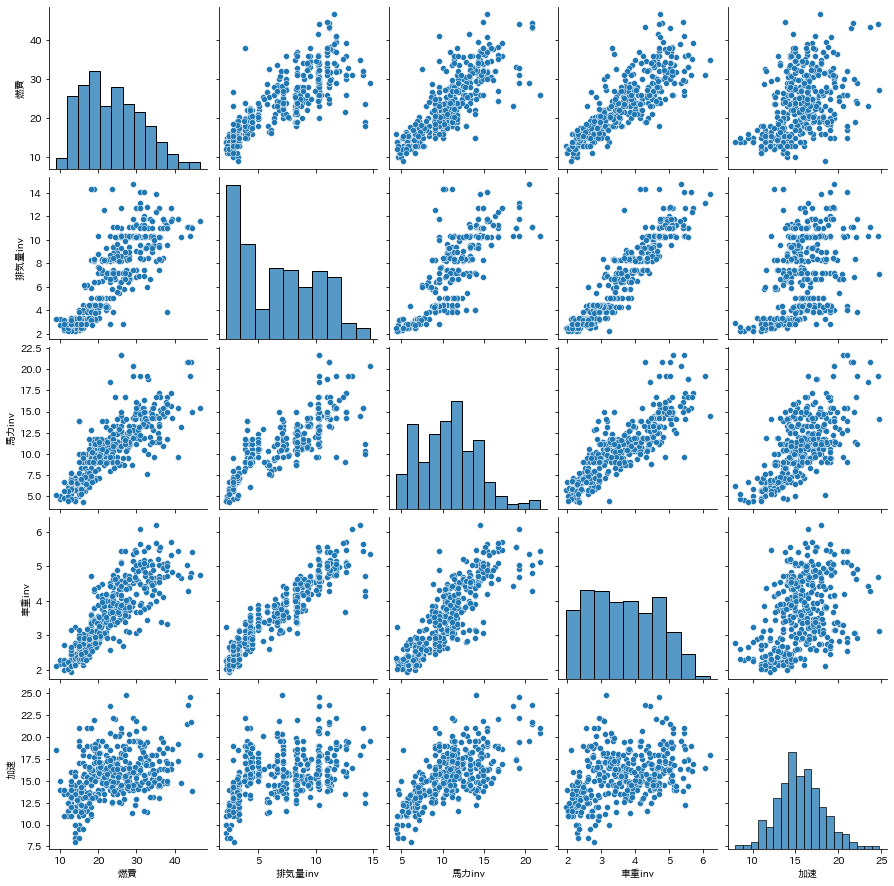

In [13]:
import seaborn as sns
columns = ['燃費','排気量inv','馬力inv','車重inv','加速']
df_nondummies = df2[columns]
sns.pairplot(df_nondummies)

##1-4.多重共線性の回避
「排気量inv」「馬力inv」「車重inv」にはお互いに強い相関が見られます。<br />
このまま説明変数として使用すると、回帰に間違った結果を伴います。<br />
※「一般最小化二乗法」では、「各説明変数が独立していること」「変数が正規分布していること」が前提です。
簡単な回避方法として、多重共線性をもつ変数同士の「掛け算」したデータをモデルに追加することで、影響を緩和させることができることが知られています。

In [14]:
df3 = df2
df3['排inv×馬inv'] = df3['排気量inv'] * df3['馬力inv']
df3['排inv×車inv'] = df3['排気量inv'] * df3['車重inv']
df3['馬inv×車inv'] = df3['馬力inv'] * df3['車重inv']
df3.head()

,燃費,排気量,馬力,車重,加速,欧州車,日本車,6気筒,8気筒,排気量inv,馬力inv,車重inv,排inv×馬inv,排inv×車inv,馬inv×車inv
0,18.0,307.0,130.0,3504,12.0,0,0,0,1,3.257329,7.692308,2.853881,25.056377,9.296030,21.952933
1,15.0,350.0,165.0,3693,11.5,0,0,0,1,2.857143,6.060606,2.707826,17.316017,7.736645,16.411064
2,18.0,318.0,150.0,3436,11.0,0,0,0,1,3.144654,6.666667,2.910361,20.964361,9.152078,19.402406
3,16.0,304.0,150.0,3433,12.0,0,0,0,1,3.289474,6.666667,2.912904,21.929825,9.581922,19.419361
4,17.0,302.0,140.0,3449,10.5,0,0,0,1,3.311258,7.142857,2.899391,23.651845,9.600633,20.709937


念の為、相関係数と掛け算変数の形状を確認します。<br />

In [15]:
df3.corr()

,燃費,排気量,馬力,車重,加速,欧州車,日本車,6気筒,8気筒,排気量inv,馬力inv,車重inv,排inv×馬inv,排inv×車inv,馬inv×車inv
燃費,1.000000,-0.804203,-0.778427,-0.831741,0.420289,0.259022,0.442174,-0.233815,-0.647308,0.813804,0.805781,0.840724,0.822772,0.813241,0.830353
排気量,-0.804203,1.000000,0.897257,0.932824,-0.543684,-0.373886,-0.433505,0.122760,0.860098,-0.920234,-0.824680,-0.887313,-0.843388,-0.865050,-0.826675
馬力,-0.778427,0.897257,1.000000,0.864538,-0.689196,-0.284948,-0.321936,-0.039952,0.835989,-0.788993,-0.920325,-0.814147,-0.805236,-0.760202,-0.844998
車重,-0.831741,0.932824,0.864538,1.000000,-0.417457,-0.298843,-0.440817,0.139308,0.799446,-0.902091,-0.836305,-0.966142,-0.859564,-0.895405,-0.883312
加速,0.420289,-0.543684,-0.689196,-0.417457,1.000000,0.204473,0.109144,0.130516,-0.560540,0.444013,0.674653,0.382186,0.523518,0.398841,0.528808
欧州車,0.259022,-0.373886,-0.284948,-0.298843,0.204473,1.000000,-0.229895,-0.174247,-0.272973,0.383703,0.314140,0.297804,0.358520,0.339648,0.307947
日本車,0.442174,-0.433505,-0.321936,-0.440817,0.109144,-0.229895,1.000000,-0.164767,-0.294053,0.514693,0.339173,0.477500,0.460808,0.517858,0.419434
6気筒,-0.233815,0.122760,-0.039952,0.139308,0.130516,-0.174247,-0.164767,1.000000,-0.305620,-0.330164,-0.105662,-0.249498,-0.310110,-0.343686,-0.228300
8気筒,-0.647308,0.860098,0.835989,0.799446,-0.560540,-0.272973,-0.294053,-0.305620,1.000000,-0.693054,-0.716155,-0.701851,-0.627613,-0.628675,-0.653517
排気量inv,0.813804,-0.920234,-0.788993,-0.902091,0.444013,0.383703,0.514693,-0.330164,-0.693054,1.000000,0.824474,0.936527,0.948867,0.981636,0.893501


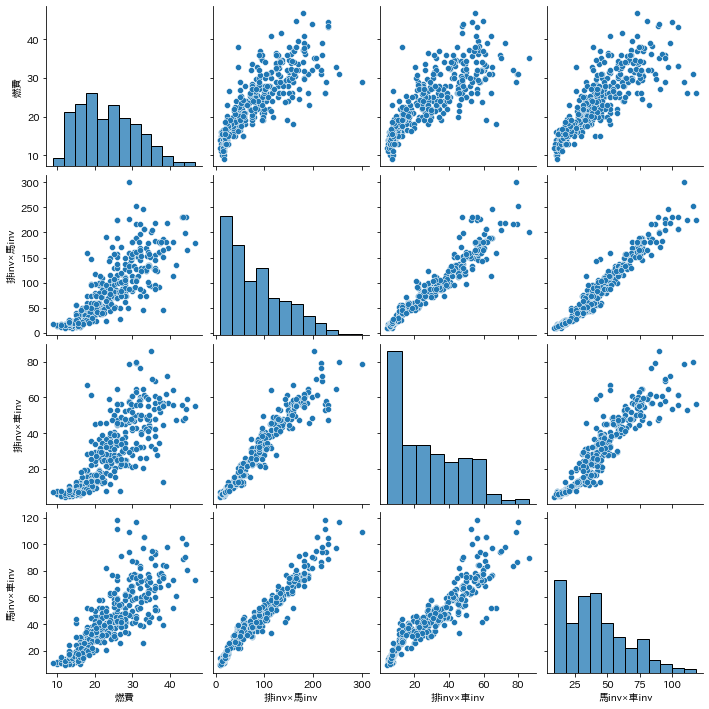

In [16]:
import seaborn as sns
columns = ['燃費','排inv×馬inv','排inv×車inv','馬inv×車inv']
df_nondummies = df2[columns]
sns.pairplot(df_nondummies)

#2.一般最小化二乗法による回帰分析
では、具体的に分析を行います。<br />
変数の組み合わせは何パターンか考えられますが、上記のグラフから、正規分布に近い分布をしているのは「加速」「馬力inv」「車重inv」の順であり、掛け算変数を追加したモデルが良さそうだ、とアタリをつけています。

In [17]:
train_val, test = train_test_split(df3,test_size = 0.2,random_state = 0)
#col = ['排気量inv', '馬力inv', '排inv×馬inv', '加速', '6気筒', '8気筒', '欧州車','日本車']
#col = ['排気量inv', '車重inv', '排inv×車inv', '加速', '6気筒', '8気筒', '欧州車','日本車']
col = ['馬力inv', '車重inv', '馬inv×車inv', '加速', '6気筒', '8気筒', '欧州車','日本車']
#col = ['排気量inv', '馬力inv', '車重inv', '排inv×馬inv', '排inv×車inv', '加速', '6気筒', '8気筒', '欧州車','日本車']
x = train_val[col]
t = train_val[['燃費']]

#訓練データと検証データに分割
x_train, x_val, y_train, y_val = train_test_split(x, t,test_size = 0.2, random_state = 0)

決定係数が0.7335。計量経済学的にはこんなもんです（汗）

In [18]:
from sklearn.linear_model import LinearRegression
model2 = LinearRegression()
model2.fit(x_train, y_train)
model2.score(x_val, y_val)

0.733557195442416

In [19]:
x = test[col]
t = test[['燃費']]
model2.score(x, t)

0.7225432522197033

では、実際に係数の値を確認してみます。<br />
予想通り日本車の燃費は群を抜いているようです。<br />
また、6気筒より8気筒のほうが若干燃費が良いのは意外でした。（マイナスなのは変わりないですが）<br />

In [20]:
model2.coef_

array([[ 2.46935709,  4.11004721, -0.25609544, -0.38840763, -2.86320224,
        -1.06996964,  0.02092611,  2.04761513]])

念の為標準化処理をして回帰させますが、もともと正規分布に近い変数を使用しているので、劇的な予測性能の向上は見込めません。

In [21]:
from sklearn.preprocessing import StandardScaler
# 訓練データを標準化
sc_model_x = StandardScaler()
sc_model_y = StandardScaler()
sc_model_x.fit(x_train)
sc_x_train = sc_model_x.transform(x_train)
sc_model_y.fit(y_train)
sc_y_train = sc_model_y.transform(y_train)
# 学習
model3 = LinearRegression()
model3.fit(sc_x_train, sc_y_train)
#検証データを標準化
sc_x_val = sc_model_x.transform(x_val)
sc_y_val = sc_model_y.transform(y_val)
# 訓練データと検証データの決定係数計算
train_score = model3.score(sc_x_train, sc_y_train)
val_score = model3.score(sc_x_val, sc_y_val)
print (train_score, val_score)

0.7767890995634386 0.733557195442416


In [22]:
model3.coef_

array([[ 1.12124311e+00,  5.25737864e-01, -7.78378103e-01,
        -1.33936986e-01, -1.51209158e-01, -6.09835150e-02,
         1.04734350e-03,  1.07378119e-01]])

#おまけ.ラッソ回帰
最後に、ラッソ回帰の変数選択機能を利用して、より予測効果の高い変数の組み合わせを探してみます。<br />

In [23]:
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(degree=2, include_bias=False)
pf_x = pf.fit_transform(sc_x_train)
pf_x.shape

(254, 44)

2乗までの範囲で、変数を網羅します。<br />
決定係数は、そこまで改善しません。<br />

In [24]:
from sklearn.linear_model import Lasso
model_Lasso = Lasso(alpha=0.1)
model_Lasso.fit(pf_x, sc_y_train)

print(model_Lasso.score(pf_x, sc_y_train))

0.7464723318467703


各説明変数の回帰係数を確認します。<br />

In [25]:
weight = model_Lasso.coef_
pd.Series(weight, index = pf.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


x0       0.402866
x1       0.348723
x2       0.000000
x3       0.000000
x4      -0.000000
x5      -0.000000
x6       0.000000
x7       0.000000
x0^2    -0.000000
x0 x1   -0.000000
x0 x2   -0.000000
x0 x3    0.000000
x0 x4   -0.000000
x0 x5    0.000000
x0 x6   -0.000000
x0 x7    0.000000
x1^2    -0.000000
x1 x2   -0.000000
x1 x3   -0.000000
x1 x4   -0.000000
x1 x5    0.000000
x1 x6   -0.000000
x1 x7   -0.000000
x2^2    -0.000000
x2 x3   -0.000000
x2 x4   -0.000000
x2 x5    0.000000
x2 x6   -0.000000
x2 x7    0.000000
x3^2     0.000000
x3 x4   -0.003128
x3 x5    0.000000
x3 x6    0.000000
x3 x7   -0.000000
x4^2    -0.021849
x4 x5    0.000000
x4 x6    0.000000
x4 x7    0.000000
x5^2    -0.000000
x5 x6    0.000000
x5 x7    0.000000
x6^2     0.000000
x6 x7   -0.000000
x7^2     0.046862
dtype: float64

model2を保存します。<br />

In [26]:
import pickle

with open('回帰.pkl', 'wb') as f:
  pickle.dump(model2, f)